In [48]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt

In [49]:

# Use the raw URL to load the file
url = "https://raw.githubusercontent.com/EZags/Milliman-Project-2025/main/Prevalence%20of%20Depression%20Per%20County.csv"
depression_prevalence = pd.read_csv(url)

# Display the DataFrame
depression_prevalence.head()

#Display information about the DataFrame
depression_prevalence.info()

,population,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_eligibility,primary_denominator,analysis_value
0,Medicare Fee For Service,2023,County,Prevalence,Unsmoothed actual,Base measure,Primary chronic conditions,Depression,All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,All,"1,000-4,999",18
1,Medicare Fee For Service,2023,County,Prevalence,Unsmoothed actual,Base measure,Primary chronic conditions,Depression,All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,All,"10,000+",18
2,Medicare Fee For Service,2023,County,Prevalence,Unsmoothed actual,Base measure,Primary chronic conditions,Depression,All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,All,"1,000-4,999",19
3,Medicare Fee For Service,2023,County,Prevalence,Unsmoothed actual,Base measure,Primary chronic conditions,Depression,All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,All,"1,000-4,999",24
4,Medicare Fee For Service,2023,County,Prevalence,Unsmoothed actual,Base measure,Primary chronic conditions,Depression,All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,All,"1,000-4,999",22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3241 entries, 0 to 3240
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   population           3241 non-null   object
 1   year                 3241 non-null   int64 
 2   geography            3241 non-null   object
 3   measure              3241 non-null   object
 4   adjustment           3241 non-null   object
 5   analysis             3241 non-null   object
 6   domain               3241 non-null   object
 7   condition            3241 non-null   object
 8   primary_sex          3241 non-null   object
 9   primary_age          3241 non-null   object
 10  primary_dual         3241 non-null   object
 11  fips                 3241 non-null   int64 
 12  county               3205 non-null   object
 13  state                3241 non-null   object
 14  urban                3241 non-null   object
 15  primary_race         3241 non-null   object
 16  primar

In [50]:
#Remove unnecessary columns in the depression prevalence DataFrame
depression_prevalence.rename(columns={
    'analysis_value' : "dep_prevalence",
}, inplace=True)
depression_prevalence = depression_prevalence[['fips','county','state','dep_prevalence']]
depression_prevalence['fips'] = depression_prevalence['fips'].astype(str).str.zfill(5)

print(depression_prevalence.shape[0])
depression_prevalence.head(15)

3241


,fips,county,state,dep_prevalence
0,01001,Autauga County,ALABAMA,18
1,01003,Baldwin County,ALABAMA,18
2,01005,Barbour County,ALABAMA,19
3,01007,Bibb County,ALABAMA,24
4,01009,Blount County,ALABAMA,22
5,01011,Bullock County,ALABAMA,14
6,01013,Butler County,ALABAMA,15
7,01015,Calhoun County,ALABAMA,22
8,01017,Chambers County,ALABAMA,18
9,01019,Cherokee County,ALABAMA,25


<Figure size 800x600 with 0 Axes>

(array([  11.,    8.,   80.,  297., 1033., 1069.,  637.,   91.,   13.,
           2.]),
 array([ 0. ,  3.5,  7. , 10.5, 14. , 17.5, 21. , 24.5, 28. , 31.5, 35. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Histogram of COPD Prevalence')

Text(0.5, 0, 'Depression Prevalence')

Text(0, 0.5, 'Number of Counties')

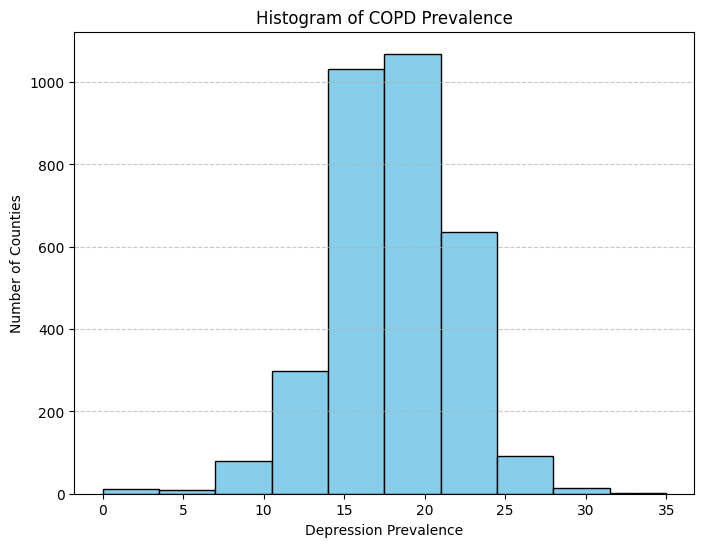

In [51]:
# Plot the histogram of depression_prevalence
plt.figure(figsize=(8, 6))  # Set figure size
plt.hist(depression_prevalence["dep_prevalence"], bins=10, color="skyblue", edgecolor="black")
plt.title("Histogram of COPD Prevalence")
plt.xlabel("Depression Prevalence")
plt.ylabel("Number of Counties")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Optional grid for clarity
plt.show()

In [52]:
import pandas as pd

# Import all datasets
income_url = "https://raw.githubusercontent.com/EZags/Milliman-Project-2025/main/Income%20Per%20County.csv"
fertility_url = "https://raw.githubusercontent.com/EZags/Milliman-Project-2025/main/Fertility%20Per%20County.csv"

# Read the datasets
income_df = pd.read_csv(income_url)
fertility_df = pd.read_csv(fertility_url)

In [53]:
import pandas as pd
import numpy as np
pd.set_option('future.no_silent_downcasting', True)

def clean_income_data(df):
    """
    Clean the income dataset by extracting FIPS codes and standardizing data.
    
    Args:
        df (pd.DataFrame): Raw income dataset
        
    Returns:
        pd.DataFrame: Cleaned dataset
    """
    # Create a copy to avoid modifying the original
    df_clean = df.copy()
    
    # Remove the header row (first row)
    df_clean = df_clean.iloc[1:].reset_index(drop=True)
    
    # Extract FIPS code from GEO_ID
    df_clean['fips'] = df_clean['GEO_ID'].str.extract(r'US(\d{5})')
    
    # Clean county and state names from NAME column
    df_clean[['county', 'state']] = df_clean['NAME'].str.extract(r'(.*?),\s*(.*?)$')
    
    # Clean numeric columns
    numeric_columns = [col for col in df_clean.columns if col.startswith('S1901')]
    for col in numeric_columns:
        # Replace '(X)' with NaN
        df_clean[col] = df_clean[col].replace('(X)', np.nan)
        # Convert to numeric, coercing errors to NaN
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    # Clean county and state names
    df_clean['county'] = df_clean['county'].str.strip()
    df_clean['state'] = df_clean['state'].str.strip()
    
    # Select and reorder columns
    columns_to_keep = ['fips', 'county', 'state'] + numeric_columns
    df_clean = df_clean[columns_to_keep]
    
    # Sort by FIPS code
    df_clean = df_clean.sort_values('fips')
    
    return df_clean

# Example usage
if __name__ == "__main__":
    # Import the data
    income_url = "https://raw.githubusercontent.com/EZags/Milliman-Project-2025/main/Income%20Per%20County.csv"
    income_df = pd.read_csv(income_url)
    
    # Clean the data
    cleaned_df = clean_income_data(income_df)
    
    # Display basic information about the cleaned dataset
    print("\nCleaned Dataset Info:")
    cleaned_df.info()
    
    print("\nFirst 5 rows of cleaned dataset:")
    cleaned_df.head()


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Columns: 131 entries, fips to S1901_C04_016M
dtypes: float64(112), int64(16), object(3)
memory usage: 874.1+ KB

First 5 rows of cleaned dataset:


,fips,county,state,S1901_C01_001E,S1901_C01_001M,S1901_C01_002E,S1901_C01_002M,S1901_C01_003E,S1901_C01_003M,S1901_C01_004E,...,S1901_C04_012E,S1901_C04_012M,S1901_C04_013E,S1901_C04_013M,S1901_C04_014E,S1901_C04_014M,S1901_C04_015E,S1901_C04_015M,S1901_C04_016E,S1901_C04_016M
0,01003,Baldwin County,Alabama,105698,2634,3.0,1.1,3.1,1.2,6.0,...,43910,8743,54380.0,5097.0,NaN,NaN,NaN,NaN,27.8,NaN
1,01015,Calhoun County,Alabama,46310,1809,7.0,2.0,5.7,1.9,9.8,...,27224,5632,38151.0,3843.0,NaN,NaN,NaN,NaN,32.8,NaN
2,01043,Cullman County,Alabama,35961,1201,5.6,2.4,5.1,2.3,10.1,...,30335,7564,45563.0,10368.0,NaN,NaN,NaN,NaN,38.5,NaN
3,01049,DeKalb County,Alabama,27182,1249,5.6,1.9,5.1,1.9,14.5,...,24969,4460,32424.0,4827.0,NaN,NaN,NaN,NaN,34.7,NaN
4,01051,Elmore County,Alabama,33692,1115,7.7,3.3,3.1,1.4,7.8,...,34794,10425,46194.0,9214.0,NaN,NaN,NaN,NaN,23.0,NaN


In [54]:
import pandas as pd
import numpy as np

# Import the fertility dataset
fertility_url = "https://raw.githubusercontent.com/EZags/Milliman-Project-2025/main/Fertility%20Per%20County.csv"
fertility_df = pd.read_csv(fertility_url, header = 1)


#Create fips column
fertility_df['fips'] = fertility_df['Geography'].str.extract(r'US(\d{5})')
fertility_df.drop(columns=['Geography'], inplace=True)

#Drop any columns Containing "Margin of Error"
fertility_df = fertility_df.loc[:, ~fertility_df.columns.str.contains('Margin of Error')]

#Rename columns so that "!!" is replaced with spaces and the word "Estimate" is removed
fertility_df.columns = fertility_df.columns.str.replace('!!', ' ').str.replace('Estimate', '').str.strip()

#Drop any columnd with 25% or more missing values
missing_threshold = 0.25 * len(fertility_df)
fertility_df = fertility_df.loc[:, fertility_df.isnull().sum() < missing_threshold]

#Only keep the "Households Total", "fips", "Households Mean income (dollars)", and "Households Median income (dollars)" columns
fertility_df = fertility_df[['fips', 'Households Total', 'Households Mean income (dollars)', 'Households Median income (dollars)']]

fertility_df.head()

#Merge this dataset to the depression prevalence dataset on fips, without dropping any rows
depression_prevalence.shape[0]
merged_df = pd.merge(depression_prevalence, fertility_df, on='fips', how='left')
merged_df.shape[0]
merged_df.head()

,fips,Households Total,Households Mean income (dollars),Households Median income (dollars)
0,01003,105698,98279,72915
1,01015,46310,74716,50780
2,01043,35961,78069,58923
3,01049,27182,58269,43509
4,01051,33692,95984,72478


3241

3241

,fips,county,state,dep_prevalence,Households Total,Households Mean income (dollars),Households Median income (dollars)
0,01001,Autauga County,ALABAMA,18,NaN,NaN,NaN
1,01003,Baldwin County,ALABAMA,18,105698.0,98279.0,72915.0
2,01005,Barbour County,ALABAMA,19,NaN,NaN,NaN
3,01007,Bibb County,ALABAMA,24,NaN,NaN,NaN
4,01009,Blount County,ALABAMA,22,NaN,NaN,NaN


In [55]:
# Ensure the required library is installed
%pip install openpyxl

# Import Excel data from GitHub
excel_url = "https://raw.githubusercontent.com/EZags/Milliman-Project-2025/main/2025%20County%20Health%20Rankings%20Data%20-%20v1.xlsx"

try:
    excel_df = pd.read_excel(excel_url, sheet_name=1, header=[0, 1], engine='openpyxl')
    
    print("\nFirst 5 rows of Excel data:")
    excel_df.head()
    print("\nExcel Dataset Info:")
    excel_df.info()
    
except Exception as e:
    print(f"Error loading Excel file: {e}")
    print("Please verify the file URL is correct and accessible")

# Drop columns with over 25% missing values
missing_threshold = 0.25 * len(excel_df)
excel_df = excel_df.loc[:, excel_df.isnull().sum() < missing_threshold]

# Flatten the MultiIndex columns into a single-level index
excel_df.columns = [' '.join(col).strip() for col in excel_df.columns]

# Any columns with "Unnamed" in the name are renamed to remove the first 21 characters from the name
excel_df.rename(columns=lambda x: x[19:] if "Unnamed" in x else x, inplace=True)

# Drop columns containing a "(" or "CI - High" or "CI - Low"
excel_df = excel_df.loc[:, ~excel_df.columns.str.contains(r'\(|CI - High|CI - Low')]

excel_df.head()

# Add a zero onto the beginning of the fips code if it is less than 5 digits long
excel_df['FIPS'] = excel_df['FIPS'].astype(str).str.zfill(5)

# Merge the excel_df with the merged_df on fips, without dropping any rows
merged_df = pd.merge(merged_df, excel_df, left_on='fips', right_on='FIPS', how='left')
merged_df.drop(columns=['FIPS', 'County', 'State'], inplace=True)
merged_df.head()


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



First 5 rows of Excel data:


Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Premature Death  \
                FIPS              State             County      Unreliable   
0               1000            Alabama                NaN             NaN   
1               1001            Alabama            Autauga             NaN   
2               1003            Alabama            Baldwin             NaN   
3               1005            Alabama            Barbour             NaN   
4               1007            Alabama               Bibb             NaN   

                                                                           \
     Deaths Years of Potential Life Lost Rate  95% CI - Low 95% CI - High   
0  102760.0                      11853.247248  11744.014820  11962.479676   
1    1008.0                       9938.263382   9021.297133  10855.229632   
2    3944.0                       8957.112686   8499.339223   9414.886148   
3     587.0                      12738.656137  11133.499025  14343.813250   
4     509.0                      11708.948038  10166.716823  13251.179253   

                                                     ...  \
  National Z-Score YPLL Rate (Hispanic (all races))  ...   
0              NaN                              NaN  ...   
1        -0.144182                              NaN  ...   
2        -0.400274                       4636.48424  ...   
3         0.586752                              NaN  ...   
4         0.317987                              NaN  ...   

                                           Injury Deaths  \
  Injury Death Rate (Non-Hispanic 2+ races) 95% CI - Low   
0                                                NaN       
1                                                NaN       
2                                                NaN       
3                                                NaN       
4                                                NaN       

                                                           \
  Injury Death Rate (Non-Hispanic 2+ races) 95% CI - High   
0                                                NaN        
1                                                NaN        
2                                                NaN        
3                                                NaN        
4                                                NaN        

                                          \
  Injury Death Rate (Non-Hispanic White)   
0                                    NaN   
1                              66.353516   
2                              86.954622   
3                              92.500356   
4                             110.157489   

                                                       \
  Injury Death Rate (Non-Hispanic White) 95% CI - Low   
0                                                NaN    
1                                          55.322574    
2                                          81.060141    
3                                          69.083690    
4                                          88.691939    

                                                       Social Associations  \
  Injury Death Rate (Non-Hispanic White) 95% CI - High      # Associations   
0                                                NaN                5916.0   
1                                          77.384459                  67.0   
2                                          92.849104                 239.0   
3                                         121.301910                  22.0   
4                                         135.248986                  19.0   

                                            \
  Social Association Rate National Z-Score   
0               11.658760              NaN   
1               11.211700         0.043429   
2                9.698298         0.308739   
3                8.904720         0.447859   
4                8.634401         0.495248   

                               Child Care Cost Burden             


Excel Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3210 entries, 0 to 3209
Columns: 225 entries, ('Unnamed: 0_level_0', 'FIPS') to ('Child Care Cost Burden', 'National Z-Score')
dtypes: float64(216), int64(1), object(8)
memory usage: 5.5+ MB


,FIPS,State,County,Premature Death Deaths,Premature Death Years of Potential Life Lost Rate,Premature Death National Z-Score,Poor Physical Health Days Average Number of Physically Unhealthy Days,Poor Physical Health Days National Z-Score,Low Birth Weight % Low Birth Weight,Low Birth Weight National Z-Score,...,Children in Poverty % Children in Poverty,Children in Poverty National Z-Score,Injury Deaths # Injury Deaths,Injury Deaths Injury Death Rate,Injury Deaths National Z-Score,Social Associations # Associations,Social Associations Social Association Rate,Social Associations National Z-Score,Child Care Cost Burden % Household Income Required for Child Care Expenses,Child Care Cost Burden National Z-Score
0,1000,Alabama,NaN,102760.0,11853.247248,NaN,4.073055,NaN,10.497739,NaN,...,21.3,NaN,23185.0,93.387132,NaN,5916.0,11.658760,NaN,25.547114,NaN
1,1001,Alabama,Autauga,1008.0,9938.263382,-0.144182,4.300364,-0.250622,9.995826,0.739956,...,17.0,-0.249566,189.0,65.975725,-1.126700,67.0,11.211700,0.043429,21.835108,-0.961825
2,1003,Alabama,Baldwin,3944.0,8957.112686,-0.400274,3.876436,-0.893693,8.133286,-0.134165,...,14.1,-0.607836,953.0,82.420053,-0.579002,239.0,9.698298,0.308739,19.354057,-1.316051
3,1005,Alabama,Barbour,587.0,12738.656137,0.586752,5.431030,1.464528,12.454212,1.893716,...,34.8,1.949468,106.0,85.603993,-0.472957,22.0,8.904720,0.447859,28.579628,0.001105
4,1007,Alabama,Bibb,509.0,11708.948038,0.317987,5.055619,0.895053,10.017472,0.750115,...,21.4,0.294015,111.0,99.630201,-0.005796,19.0,8.634401,0.495248,26.582776,-0.283990


,fips,county,state,dep_prevalence,Households Total,Households Mean income (dollars),Households Median income (dollars),Premature Death Deaths,Premature Death Years of Potential Life Lost Rate,Premature Death National Z-Score,...,Children in Poverty % Children in Poverty,Children in Poverty National Z-Score,Injury Deaths # Injury Deaths,Injury Deaths Injury Death Rate,Injury Deaths National Z-Score,Social Associations # Associations,Social Associations Social Association Rate,Social Associations National Z-Score,Child Care Cost Burden % Household Income Required for Child Care Expenses,Child Care Cost Burden National Z-Score
0,01001,Autauga County,ALABAMA,18,NaN,NaN,NaN,1008.0,9938.263382,-0.144182,...,17.0,-0.249566,189.0,65.975725,-1.126700,67.0,11.211700,0.043429,21.835108,-0.961825
1,01003,Baldwin County,ALABAMA,18,105698.0,98279.0,72915.0,3944.0,8957.112686,-0.400274,...,14.1,-0.607836,953.0,82.420053,-0.579002,239.0,9.698298,0.308739,19.354057,-1.316051
2,01005,Barbour County,ALABAMA,19,NaN,NaN,NaN,587.0,12738.656137,0.586752,...,34.8,1.949468,106.0,85.603993,-0.472957,22.0,8.904720,0.447859,28.579628,0.001105
3,01007,Bibb County,ALABAMA,24,NaN,NaN,NaN,509.0,11708.948038,0.317987,...,21.4,0.294015,111.0,99.630201,-0.005796,19.0,8.634401,0.495248,26.582776,-0.283990
4,01009,Blount County,ALABAMA,22,NaN,NaN,NaN,1273.0,11898.088409,0.367355,...,16.6,-0.298983,287.0,98.254695,-0.051609,44.0,7.393467,0.712793,25.313260,-0.465242


In [56]:
#Drop any columns that contain "Z-Score" in the name
merged_df = merged_df.loc[:, ~merged_df.columns.str.contains('Z-Score')]
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3241 entries, 0 to 3240
Data columns (total 59 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   fips                                                                        3241 non-null   object 
 1   county                                                                      3205 non-null   object 
 2   state                                                                       3241 non-null   object 
 3   dep_prevalence                                                              3241 non-null   int64  
 4   Households Total                                                            845 non-null    float64
 5   Households Mean income (dollars)                                            845 non-null    float64
 6   Households Median income (dollars)              

In [57]:
#Combine the county and state columns, with a comma in between and make the state name lower case
merged_df['county_state'] = merged_df['county'] + ', ' + merged_df['state']
merged_df['county_state'] = merged_df['county_state'].str.upper()
#Drop the county and state columns
merged_df.drop(columns=['county', 'state'], inplace=True)
#Move the county_state column to the front of the DataFrame
merged_df = merged_df[['county_state'] + [col for col in merged_df.columns if col != 'county_state']]
merged_df.head()

,county_state,fips,dep_prevalence,Households Total,Households Mean income (dollars),Households Median income (dollars),Premature Death Deaths,Premature Death Years of Potential Life Lost Rate,Poor Physical Health Days Average Number of Physically Unhealthy Days,Low Birth Weight % Low Birth Weight,...,Unemployment % Unemployed,Income Inequality 80th Percentile Income,Income Inequality 20th Percentile Income,Income Inequality Income Ratio,Children in Poverty % Children in Poverty,Injury Deaths # Injury Deaths,Injury Deaths Injury Death Rate,Social Associations # Associations,Social Associations Social Association Rate,Child Care Cost Burden % Household Income Required for Child Care Expenses
0,"AUTAUGA COUNTY, ALABAMA",01001,18,NaN,NaN,NaN,1008.0,9938.263382,4.300364,9.995826,...,2.188889,132562.0,31018.0,4.273712,17.0,189.0,65.975725,67.0,11.211700,21.835108
1,"BALDWIN COUNTY, ALABAMA",01003,18,105698.0,98279.0,72915.0,3944.0,8957.112686,3.876436,8.133286,...,2.279497,141920.0,32554.0,4.359526,14.1,953.0,82.420053,239.0,9.698298,19.354057
2,"BARBOUR COUNTY, ALABAMA",01005,19,NaN,NaN,NaN,587.0,12738.656137,5.431030,12.454212,...,4.431017,99138.0,17658.0,5.614339,34.8,106.0,85.603993,22.0,8.904720,28.579628
3,"BIBB COUNTY, ALABAMA",01007,24,NaN,NaN,NaN,509.0,11708.948038,5.055619,10.017472,...,2.462380,102593.0,19188.0,5.346727,21.4,111.0,99.630201,19.0,8.634401,26.582776
4,"BLOUNT COUNTY, ALABAMA",01009,22,NaN,NaN,NaN,1273.0,11898.088409,4.802400,7.646305,...,2.144295,117729.0,25484.0,4.619722,16.6,287.0,98.254695,44.0,7.393467,25.313260


In [58]:
#Read in file "co-est2024-pop.xlsx" from the GitHub repository
population_url = "https://raw.githubusercontent.com/EZags/Milliman-Project-2025/main/co-est2024-pop.xlsx"
population_df = pd.read_excel(population_url, sheet_name=0, header=3, engine='openpyxl')
#Drop row 0
#Only keep column 0 and 5
population_df = population_df.iloc[:, [0, 5]]
#Rename the columns
population_df = population_df.iloc[1:]
#Rename the first column to say "fips"
population_df.rename(columns={population_df.columns[0]: 'fips'}, inplace=True)
#Remove the first character in the fips column
population_df['fips'] = population_df['fips'].astype(str).str[1:]
#Capitalize the fips column
population_df['fips'] = population_df['fips'].str.upper()

population_df.head()

,fips,2023
1,"AUTAUGA COUNTY, ALABAMA",60436.0
2,"BALDWIN COUNTY, ALABAMA",254107.0
3,"BARBOUR COUNTY, ALABAMA",24644.0
4,"BIBB COUNTY, ALABAMA",21890.0
5,"BLOUNT COUNTY, ALABAMA",59777.0


In [59]:
#Merge the population_df with the merged_df on fips, without dropping any rows
merged_df = pd.merge(merged_df, population_df, on='fips', how='left')
merged_df.head()

,county_state,fips,dep_prevalence,Households Total,Households Mean income (dollars),Households Median income (dollars),Premature Death Deaths,Premature Death Years of Potential Life Lost Rate,Poor Physical Health Days Average Number of Physically Unhealthy Days,Low Birth Weight % Low Birth Weight,...,Income Inequality 80th Percentile Income,Income Inequality 20th Percentile Income,Income Inequality Income Ratio,Children in Poverty % Children in Poverty,Injury Deaths # Injury Deaths,Injury Deaths Injury Death Rate,Social Associations # Associations,Social Associations Social Association Rate,Child Care Cost Burden % Household Income Required for Child Care Expenses,2023
0,"AUTAUGA COUNTY, ALABAMA",01001,18,NaN,NaN,NaN,1008.0,9938.263382,4.300364,9.995826,...,132562.0,31018.0,4.273712,17.0,189.0,65.975725,67.0,11.211700,21.835108,NaN
1,"BALDWIN COUNTY, ALABAMA",01003,18,105698.0,98279.0,72915.0,3944.0,8957.112686,3.876436,8.133286,...,141920.0,32554.0,4.359526,14.1,953.0,82.420053,239.0,9.698298,19.354057,NaN
2,"BARBOUR COUNTY, ALABAMA",01005,19,NaN,NaN,NaN,587.0,12738.656137,5.431030,12.454212,...,99138.0,17658.0,5.614339,34.8,106.0,85.603993,22.0,8.904720,28.579628,NaN
3,"BIBB COUNTY, ALABAMA",01007,24,NaN,NaN,NaN,509.0,11708.948038,5.055619,10.017472,...,102593.0,19188.0,5.346727,21.4,111.0,99.630201,19.0,8.634401,26.582776,NaN
4,"BLOUNT COUNTY, ALABAMA",01009,22,NaN,NaN,NaN,1273.0,11898.088409,4.802400,7.646305,...,117729.0,25484.0,4.619722,16.6,287.0,98.254695,44.0,7.393467,25.313260,NaN


In [60]:
# Save the dataframe to CSV and verify the file was created
import os

# Save to CSV
csv_path = 'merged_data.csv'
merged_df.to_csv(csv_path, index=False)

# Verify file exists and print location
if os.path.exists(csv_path):
    print(f"CSV file successfully saved at: {os.path.abspath(csv_path)}")
else:
    print("Error: CSV file was not created")

CSV file successfully saved at: C:\Users\ezago\AppData\Local\Programs\Microsoft VS Code\merged_data.csv
